<a href="https://colab.research.google.com/github/sneraikar/Coronavirus-tweet-sentiment-analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

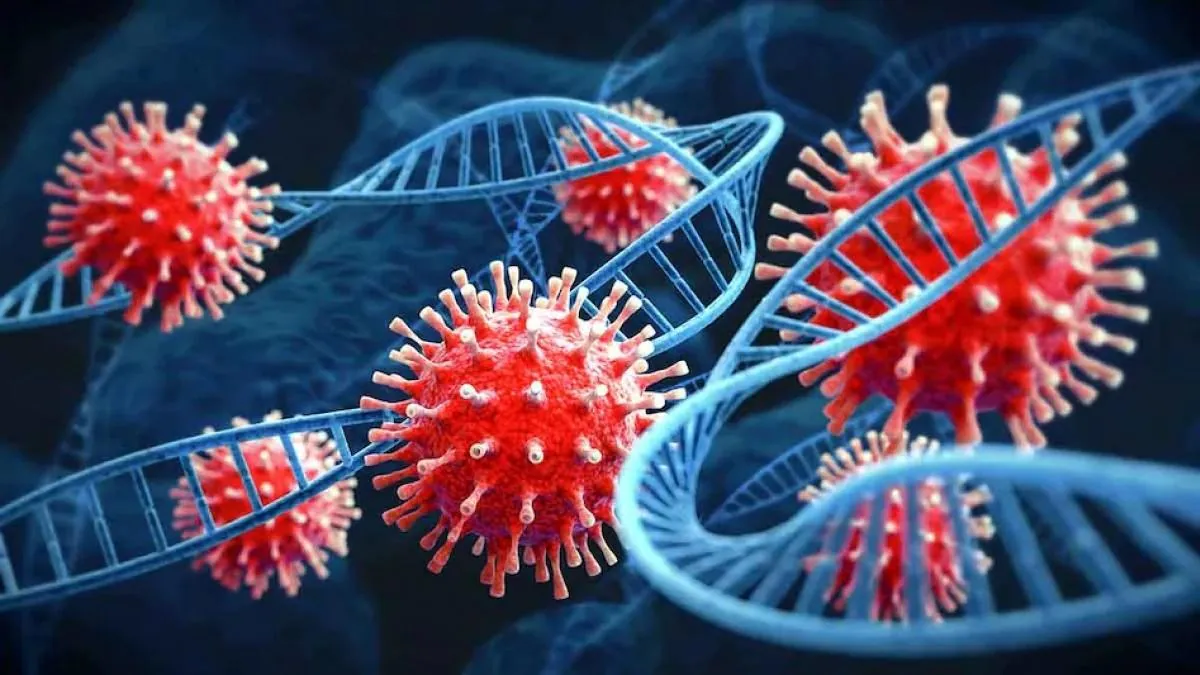

#Step 1:Exploratory Data Analysis

**Import Libraries**

In [221]:
# import all necessary libraries

import pandas as pd
import numpy as np
from numpy import math
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

import re # for regular expressions
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english') # load stop words
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim

from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read the dataset**

In [222]:
#mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
#load dataset using pandas function
df=pd.read_csv("/content/drive/MyDrive/Supervised classification/Coronavirus Tweets.csv",encoding="ISO-8859-1")

**Observations of dataset**

In [224]:
#print first 5 observations
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [225]:
#print last 5 observations
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Create a backup copy of data**

In [226]:
df_backup=df.copy()

**Check for duplicates**


In [227]:
print("Duplicate entries:",len(df[df.duplicated()]))

Duplicate entries: 0


In [228]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

**Basic information about dataset**

In [229]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n") 
# Custom Function
df.info()

Total Rows and Columns in DataFrame is : (41157, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**statistical info**


In [230]:
# statistics info
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


The dataset contains 41157 rows and 6 columns. Each row of the dataset contains information about one tweets.

In [231]:
# dataset contain Text data so its better to convert it into string 
df['OriginalTweet']=df['OriginalTweet'].astype(str)
df['Sentiment']=df['Sentiment'].astype(str)

**Missing values**

In [232]:
#to find columns having null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [233]:
df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [234]:
# Data has 5 clases of Sentiments,convert them into 3
def classes_con(x):

  if x == 'Extremely Positive':
    return "Positive"
  if x == 'Positive':
    return "Positive"   
  elif x == "'Extremely Negative":
    return "Negative"  
  elif x == "Negative":  
    return "Negative"  
  else:
    return "Neutral" 

df["Sentiment"]=df["Sentiment"].apply(lambda x:classes_con(x))    

df.Sentiment.value_counts()

Positive    18046
Neutral     13194
Negative     9917
Name: Sentiment, dtype: int64

#**Sentiment analysis**

In [235]:
analysis_1= df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis_1

,Sentiment,OriginalTweet
2,Positive,18046
1,Neutral,13194
0,Negative,9917


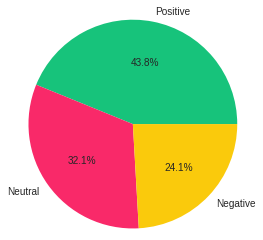

In [236]:
# count plot on Sentiment categorical variable
percent_class = analysis_1['OriginalTweet']
labels= analysis_1.Sentiment
colors = ['#17C37B','#F92969','#FACA0C']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2)

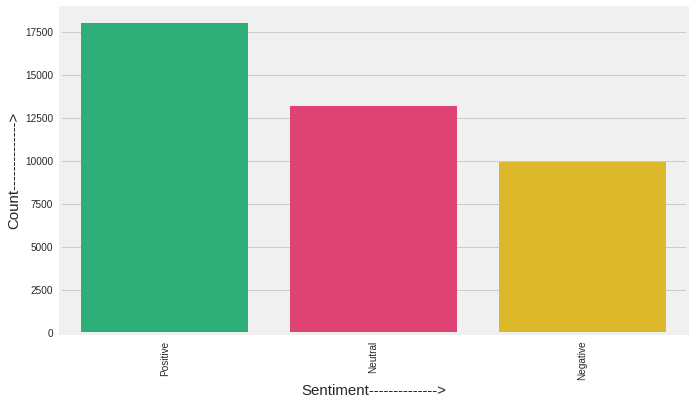

In [237]:
# ploting countplot for "Sentiment" column
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.countplot('Sentiment',data=df,order=df.Sentiment.value_counts().index,palette = ['#17C37B','#F92969','#FACA0C'])
plt.xlabel("Sentiment-------------->", fontsize=15)
plt.ylabel("Count-------------->", fontsize=15)
plt.xticks(rotation=90)
plt.show();

**Number of characters**

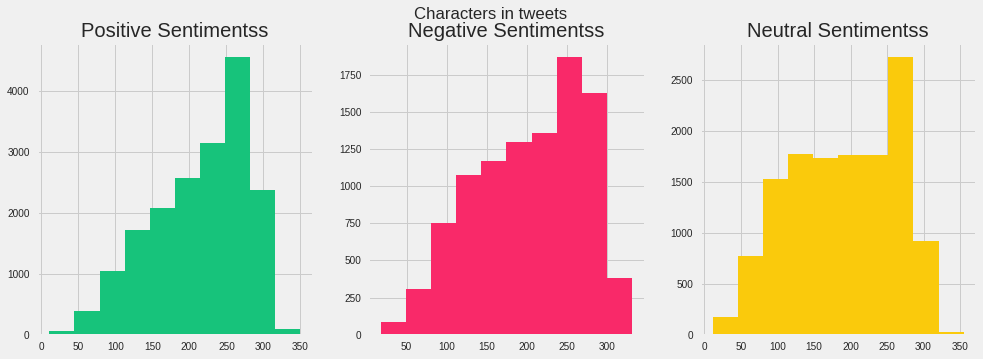

In [238]:
# Histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= df[df['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentimentss')

# Histogram for Negative Sentiments
tweet_len=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentimentss')

# Histogram for Neutral Sentiments
tweet_len=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentimentss')

fig.suptitle('Characters in tweets')
plt.show()

**Number of words in a tweet**

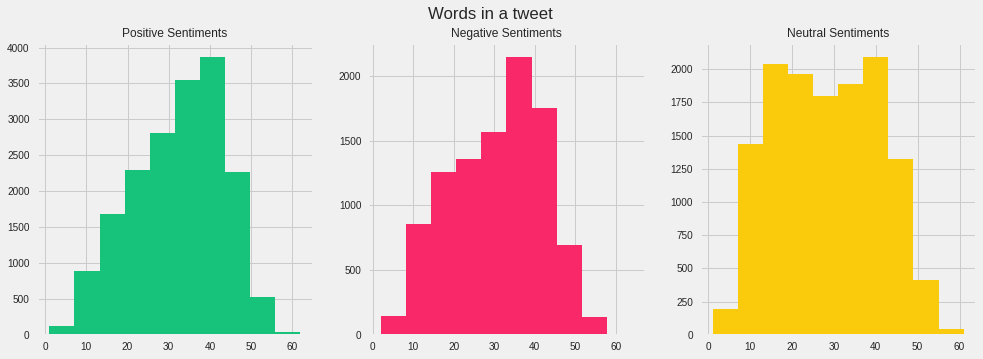

In [239]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
plt.style.use('seaborn')
# Histogram for Positive Sentiments
tweet=df[df['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet,color='#17C37B')
ax1.set_title('Positive Sentiments')

# Histogram for Negative Sentiments
tweet=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet,color='#F92969')
ax2.set_title('Negative Sentiments')

# Histogram for Neutral Sentiments
tweet=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

**Common stopwords in tweets**

In [240]:
# Downloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [241]:
# Function to create a corpus 
def create_corpus(target):
    corpus=[] 
    for x in df[df['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

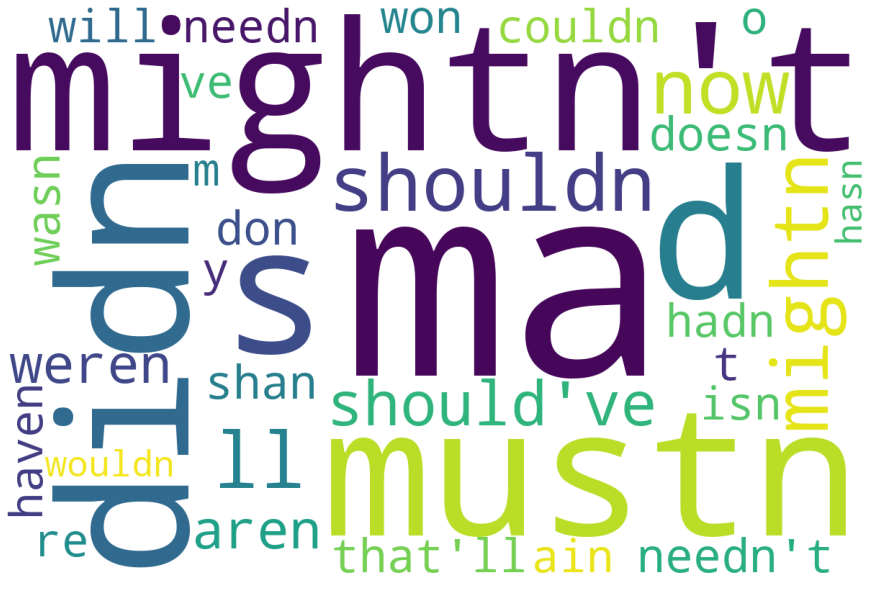

In [242]:
# Cloudword for Stopwords present in dataset

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
comment_words = '' 
stopwords= set(STOPWORDS)

for val in stop:     
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 6).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

<BarContainer object of 10 artists>

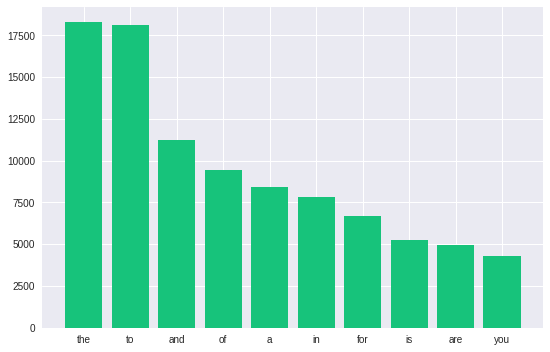

In [243]:
# Stopwords in Positive sentiments
corpus=create_corpus("Positive")
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

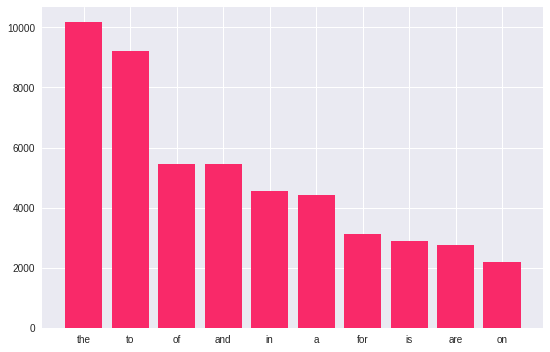

In [244]:
# Stopwords in Negative sentiments
corpus=create_corpus("Negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 10 artists>

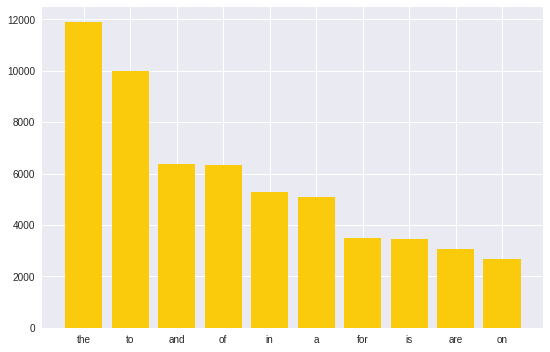

In [245]:
# Stopwords in Neutral sentiments
corpus=create_corpus("Neutral")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
               
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#FACA0C')

**Punctuations**

<BarContainer object of 27 artists>

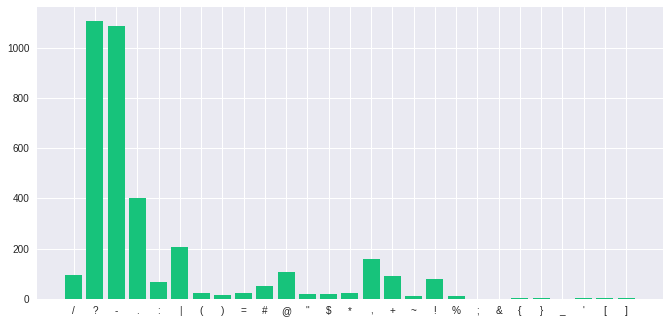

In [246]:
# Punctuations in Positive sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 23 artists>

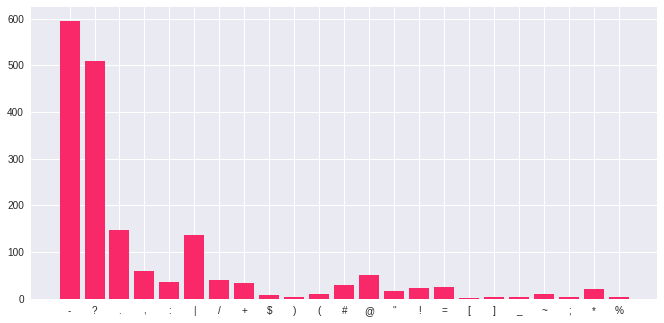

In [247]:
# Punctuations in Negative sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

<BarContainer object of 26 artists>

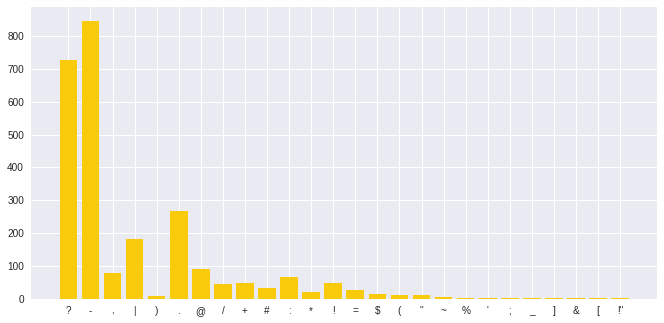

In [248]:
# Punctuations in Neutral sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')

**Common words**

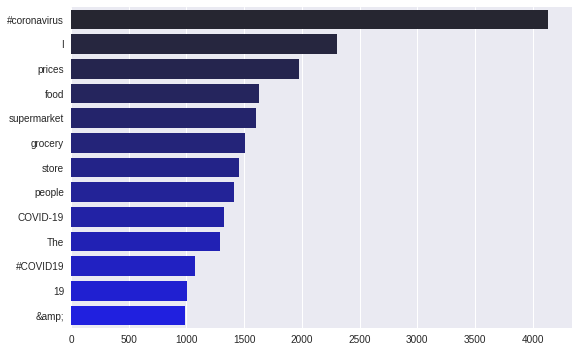

In [249]:
# Barplot for common words
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x,palette="dark:blue");   

**Hashtags**

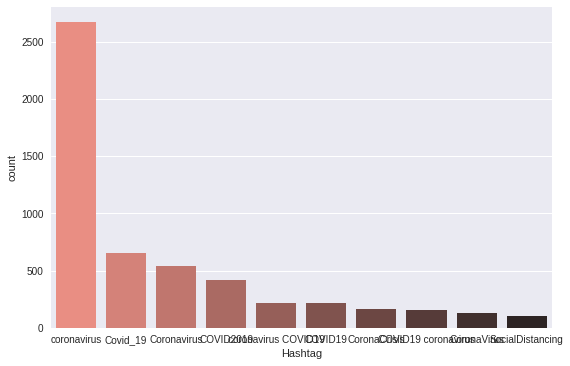

In [250]:
import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
df['hash']=df['OriginalTweet'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp,palette="dark:salmon_r")

**Mentions**

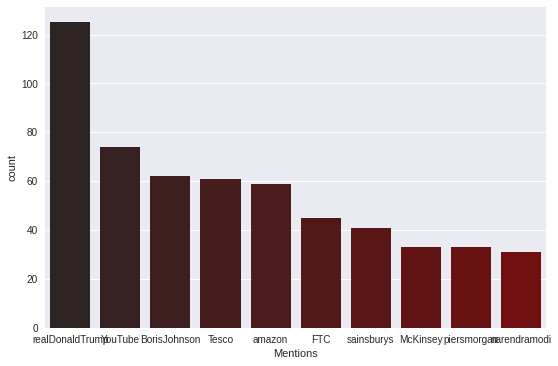

In [251]:
def mentions(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
df['mentions']=df['OriginalTweet'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp,palette="dark:maroon")

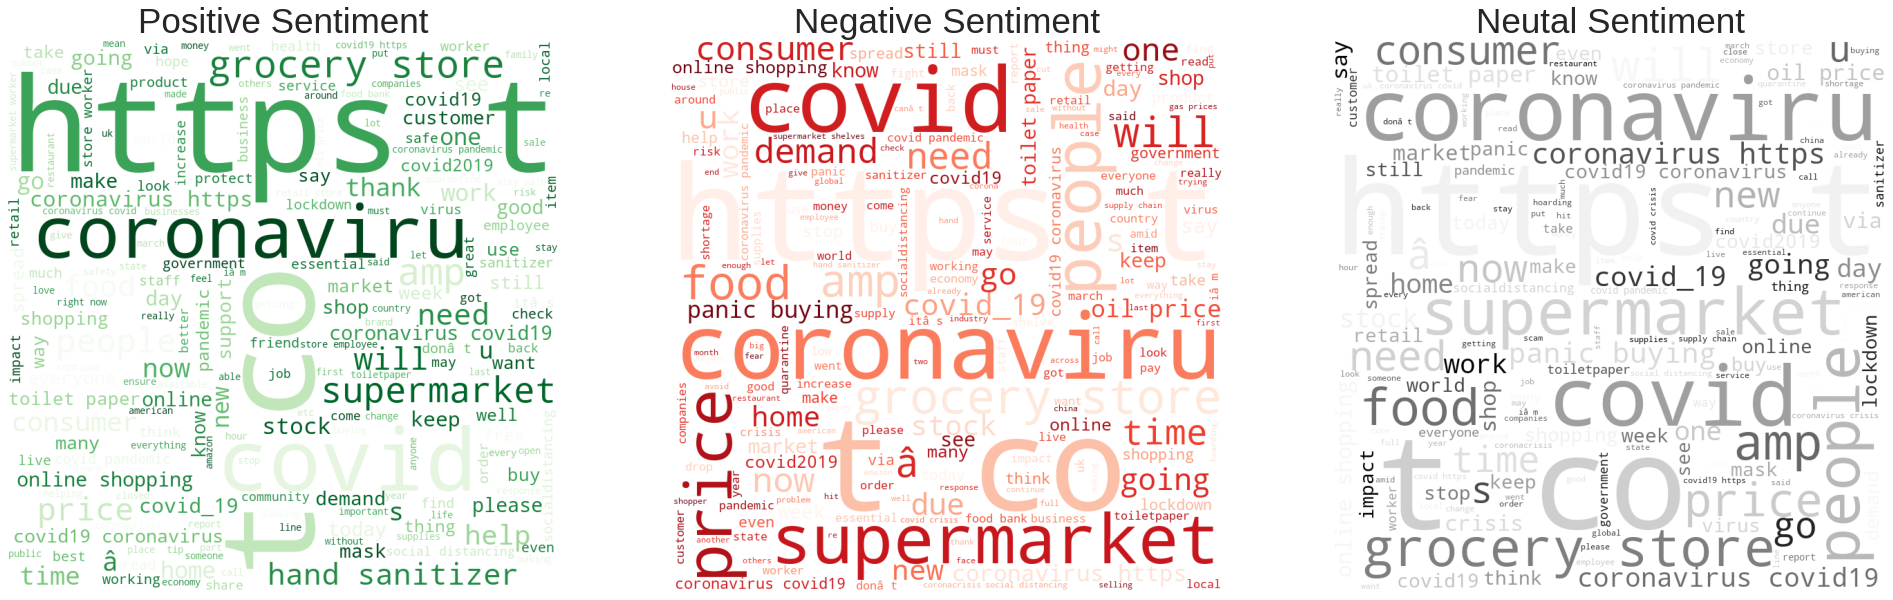

In [252]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

data_pos = df[df["Sentiment"]=="Positive"]
data_neg = df[df["Sentiment"]=="Negative"]
data_neu = df[df["Sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data_pos.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in data_neg.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in data_neu.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

# Step 2 - Data Preprocessing


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:


In [253]:
# Filter columns
data_M=df[["OriginalTweet","Sentiment"]]
data_M

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Neutral
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Neutral
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [254]:
# Conversion of sentiments
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 1
    elif sentiment == "Positive":
        return 1
    elif sentiment == "Extremely Negative":
        return 0
    elif sentiment == "Negative":
        return 0
    else:
        return 2

data_M['Sentiment'] = data_M['Sentiment'].apply(lambda x: change_sen(x))  

In [255]:
# Function to clean the text
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
    #     convert to lower case
    text = text.lower()
      
    return text

data_M['OriginalTweet'] = data_M['OriginalTweet'].apply(lambda x: clean(x))

#Training and validation set for MultiClass classification

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [256]:
# Import train_test_split from sklearn library to make split of data_M into train sets and validation sets
from sklearn.model_selection import train_test_split
train,valid = train_test_split(data_M,test_size = 0.2,random_state=0,stratify = data_M.Sentiment.values) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input data_Mset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


**Use of counter Vectorizer for Multi Class classification**

In [257]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

train_inputs = vectorizer.fit_transform(train.OriginalTweet.values)
val_inputs = vectorizer.transform(valid.OriginalTweet.values)

train_targets = train.Sentiment.values
val_targets = valid.Sentiment.values

print("train_inputs.shape : ", train_inputs.shape)
print("val_inputs.shape : ", val_inputs.shape)
print("train_targets.shape : ", train_targets.shape)
print("val_targets.shape : ", val_targets.shape)

train_inputs.shape :  (32925, 30201)
val_inputs.shape :  (8232, 30201)
train_targets.shape :  (32925,)
val_targets.shape :  (8232,)


#Model Comparisons for multiclass Classification

In [258]:
# Instantiate  models
models = [
          ['NaiveByes_clf: ',               MultinomialNB()],
          ['SGD_clf: ',                     SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ',            RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ',           SVC()],
          ['Logistic_clf: ',                LogisticRegression()]
]       

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    end = time.time()
    model.fit(train_inputs,train_targets) 
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(train_targets, model.predict(train_inputs))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(val_targets, model.predict(val_inputs))

    model_data.append(model_data_dic)

In [ ]:
# Convert list to dataframe
df_models= pd.DataFrame(model_data)
print(df_models)

**Converting multiclass classification into binary classification**

In [260]:
# Filter columns
data_B=df[["OriginalTweet","Sentiment"]]

In [261]:
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 1
    elif sentiment == "Positive":
        return 1
    elif sentiment == "Extremely Negative":
        return 0
    elif sentiment == "Negative":
        return 0
    else:
        return 1

data_B['Sentiment'] = data_B['Sentiment'].apply(lambda x: change_sen(x))   
data_B['OriginalTweet'] = data_B['OriginalTweet'].apply(lambda x: clean(x))

**Training and Validation Set for Binary class Classification**

Training and Validation Set for Binary class Classification
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
# Import train_test_split from sklearn library to make split of data into train sets and validation sets
from sklearn.model_selection import train_test_split
train,valid = train_test_split(data_B,test_size = 0.2,random_state=0,stratify = data.Sentiment.values) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

**Use Of Counter Vectorizer For Binary Class Classification**

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

train_inputs = vectorizer.fit_transform(train.OriginalTweet.values)
val_inputs = vectorizer.transform(valid.OriginalTweet.values)

train_targets = train.Sentiment.values
val_targets = valid.Sentiment.values

print("train_inputs.shape : ", train_inputs.shape)
print("val_inputs.shape : ", val_inputs.shape)
print("train_targets.shape : ", train_targets.shape)
print("val_targets.shape : ", val_targets.shape)

**Model Comparisons for Binary class Classification**

In [ ]:
# Instantiate models
models = [
          ['NaiveByes_clf: ',               MultinomialNB()],
          ['SGD_clf: ',                     SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ',            RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ',           SVC()],
          ['Logistic_clf: ',                LogisticRegression()]
] 
          

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    end = time.time()
    model.fit(train_inputs,train_targets) 
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(train_targets, model.predict(train_inputs))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(val_targets, model.predict(val_inputs))

    model_data.append(model_data_dic)

In [ ]:
# Convert list to dataframe
df_m = pd.DataFrame(model_data)
print(df_m)

#**Final Model**

**Logistic Regression**

In [ ]:
# Instantiate Logistic regression model
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()
log_clf.fit(train_inputs,train_targets) 

Performance Evaluation

In [ ]:
# Function for performance metrics
from sklearn.metrics import plot_confusion_matrix,classification_report

def report(model):
    preds = model.predict(val_inputs)
    accuracy=accuracy_score(val_targets,preds)
    print(accuracy)
    print(classification_report(val_targets,preds))
    plot_confusion_matrix(model,val_inputs,val_targets)

In [ ]:
print("Logistic Regression")
report(log_clf)

#**Hyperparameters**

**C Regularization parameter**

 The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is inversely proportional to this value.

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_inputs,train_targets) 


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Tuned Model
from sklearn.linear_model import LogisticRegression

tune_model= LogisticRegression(C=0.5,penalty="l1",solver="liblinear")
tune_model.fit(train_inputs,train_targets) 

In [ ]:
print("Logistic Regression")
report(tune_model)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.8892 - 0.878) / 0.878))

# CONCLUSION

 COVID-19 disease is global health problem and has affected most countries and their economies, this model focuses on analysing people’s reaction to the pandemic. 
 
 The main goal of the model is to deduce whether the sentiment of the public opinion is positive or negative by applying machine learning algorithms.
  
  Despite the fact that the analysis found variation of opinions, it seems that people mostly remain positive about the pandemic, January is the only month in which negative thoughts predominated, March is the month when the COVID-19 disease was declared as a pandemic and many countries started to apply care measures and safety protocols, which coincides with the rise of positive thoughts. 